In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#importing the data
df = pd.read_csv('cars.csv')

In [ ]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [ ]:
df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [ ]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [ ]:
df.isnull().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [ ]:
current = 2026
df['age'] =   current - df['Year']

In [ ]:
df.drop('Year',axis=1,inplace=True)

In [ ]:
df.head()

,Car_ID,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,age
0,1,Toyota,Corolla,50000,Petrol,Manual,First,15,1498,108,5,800000,8
1,2,Honda,Civic,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,7
2,3,Ford,Mustang,20000,Petrol,Automatic,First,10,4951,395,4,2500000,9
3,4,Maruti,Swift,30000,Diesel,Manual,Third,23,1248,74,5,600000,6
4,5,Hyundai,Sonata,60000,Diesel,Automatic,Second,18,1999,194,5,850000,10


In [ ]:
df1 = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
 12  age                100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


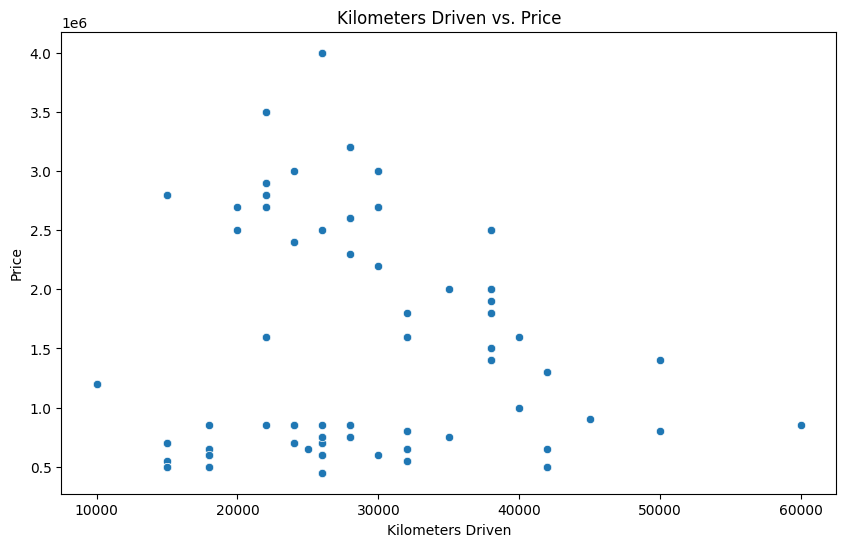

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers_Driven', y='Price', data=df)
plt.title('Kilometers Driven vs. Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

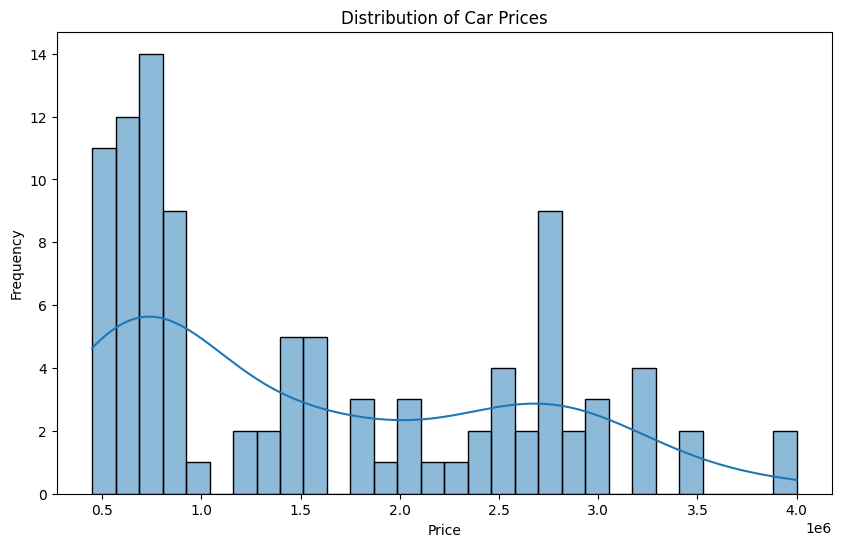

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#labeling for the dataset using pd.get dummies
categorical_cols = [
    "Brand",
    "Fuel_Type",
    "Transmission",
    "Owner_Type",
    "Model"
]

print("Columns before get_dummies:", df.columns.tolist())
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Columns after get_dummies:", df.columns.tolist())

Columns before get_dummies: ['Car_ID', 'Brand', 'Model', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'age']
Columns after get_dummies: ['Car_ID', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'age', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes', 'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second', 'Owner_Type_Third', 'Model_5 Series', 'Model_7 Series', 'Model_A3', 'Model_A4', 'Model_A5', 'Model_A6', 'Model_Altroz', 'Model_Ameo', 'Model_Aspire', 'Model_BR-V', 'Model_C-Class', 'Model_Camry', 'Model_City', 'Model_Civic', 'Model_Corolla', 'Model_Creta', 'Model_E-Class', 'Model_EcoSport', 'Model_Elantra', 'Model_Endeavour', 'Model_Ertiga', 'Model_Figo', 'Model_Fortuner', 'Model_GLA', 'Model_GLC', 'Model_GLE', 'Model_Harrier', 'Model_Innova', 'Model_Innova Crysta', 'Model_Mustang

In [ ]:
df.head()

,Car_ID,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,age,Brand_BMW,Brand_Ford,...,Model_Vento,Model_Venue,Model_Verna,Model_Vitara,Model_WR-V,Model_X1,Model_X3,Model_X5,Model_XUV300,Model_Yaris
0,1,50000,15,1498,108,5,800000,8,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,40000,17,1597,140,5,1000000,7,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,20000,10,4951,395,4,2500000,9,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4,30000,23,1248,74,5,600000,6,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,60000,18,1999,194,5,850000,10,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X


,Car_ID,Kilometers_Driven,Mileage,Engine,Power,Seats,age,Brand_BMW,Brand_Ford,Brand_Honda,...,Model_Vento,Model_Venue,Model_Verna,Model_Vitara,Model_WR-V,Model_X1,Model_X3,Model_X5,Model_XUV300,Model_Yaris
0,1,50000,15,1498,108,5,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,40000,17,1597,140,5,7,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,20000,10,4951,395,4,9,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,30000,23,1248,74,5,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,60000,18,1999,194,5,10,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,22000,16,1950,191,5,7,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,97,38000,13,2755,171,7,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,98,26000,18,1497,121,5,8,False,True,False,...,False,False,False,False,False,False,False,False,False,False
98,99,24000,17,1497,113,5,7,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
#spliting into test, teain
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
# Feature Scaling
#Kilometers_Driven may be in lakhs
#Engine/Power in small numbers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_preds = lr.predict(X_test_scaled)

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr_preds = rfr.predict(X_test)

In [ ]:
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train )
dtr_preds = dtr.predict(X_test)

In [ ]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

gb_preds = gb.predict(X_test)

In [ ]:
def evaluate_model(name, y_test, preds):
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"🔹 {name}")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
    print("-" * 30)

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree", y_test, dtr_preds)
evaluate_model("Random Forest", y_test, rfr_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)

🔹 Linear Regression
MAE  : 196998.12
RMSE : 352830.04
R²   : 0.8478
------------------------------
🔹 Decision Tree
MAE  : 221170.63
RMSE : 421357.62
R²   : 0.7829
------------------------------
🔹 Random Forest
MAE  : 199825.00
RMSE : 377973.86
R²   : 0.8253
------------------------------
🔹 Gradient Boosting
MAE  : 168159.52
RMSE : 333823.14
R²   : 0.8637
------------------------------


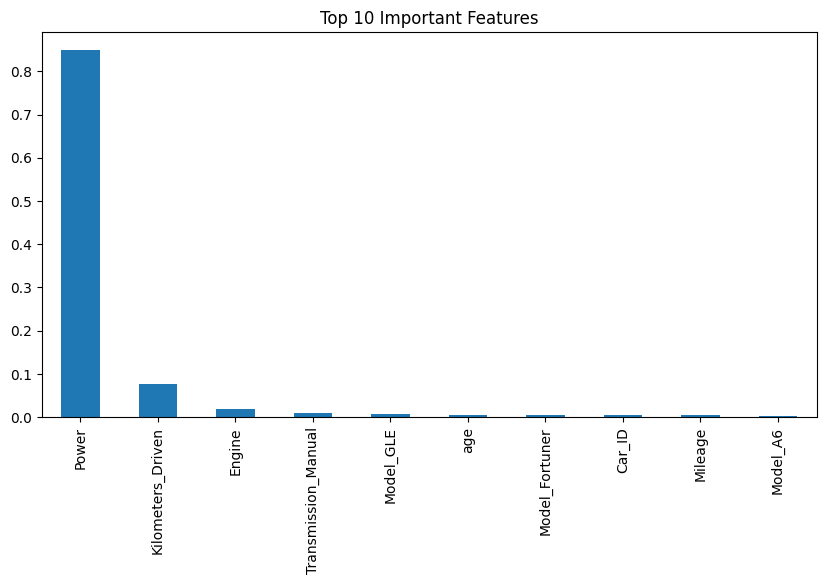

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rfr.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,5))
feat_imp.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()

In [ ]:
import joblib

joblib.dump(rfr, "car_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns, "model_columns.pkl")

['model_columns.pkl']

In [ ]:

pip install streamlit
